#How to avoid over-fitting in CNN keras 

#Using 2 techniques



1.   Modification of the regularization term (l2)
2.   DropOut Modification



##Importing mnist handwritting datasets

In [23]:
%%capture
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

##Visualizing datasets

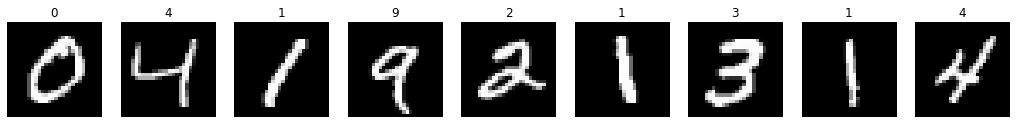

In [24]:
import matplotlib.pyplot as plt

num_imgs = 10
plt.figure(figsize=(num_imgs*2,3))

for i in range(1,num_imgs):
    plt.subplot(1,num_imgs,i).set_title('{}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

##Data normalization
###Converting the data into range of 0 to 1 from 0 to 255

In [25]:
import numpy as np

print('Max = {}\nMin = {}'.format(np.max(x_train), np.min(x_train)))

Max = 255
Min = 0


In [26]:
x_train = x_train/255
x_test = x_test/255

print('Max = {}\nMin = {}'.format(np.max(x_train), np.min(x_train)))

Max = 1.0
Min = 0.0


##One-Hot Encoding
###Making data binary from numbers 

In [27]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


##Model creation
###Create a CNN

In [28]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()


'''
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 activation_2 (Activation)   (None, 10)                0

"\nmodel = tf.keras.Sequential([\n                             tf.keras.layers.Flatten(input_shape=input_shape),\n                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), \n                             tf.keras.layers.Activation('tanh'),\n                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),\n                             tf.keras.layers.Activation('tanh'),\n                             tf.keras.layers.Dense(units=nclasses), \n                             tf.keras.layers.Activation('sigmoid')\n                             ])\nmodel.summary()\n"

##Model Training
###Optimizer Adam with learning rate 0.0005 

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.5101 - accuracy: 0.8678 - val_loss: 0.2687 - val_accuracy: 0.9228
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2381 - accuracy: 0.9313 - val_loss: 0.2103 - val_accuracy: 0.9372
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1856 - accuracy: 0.9462 - val_loss: 0.1708 - val_accuracy: 0.9493
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1512 - accuracy: 0.9556 - val_loss: 0.1516 - val_accuracy: 0.9567
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1272 - accuracy: 0.9633 - val_loss: 0.1364 - val_accuracy: 0.9588
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1092 - accuracy: 0.9678 - val_loss: 0.1206 - val_accuracy: 0.9635
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0954 - accuracy: 0.9727 - val_loss: 0.1103 - val_accuracy: 0.9660
Epoch 

###Visualization of the loss and accuracy

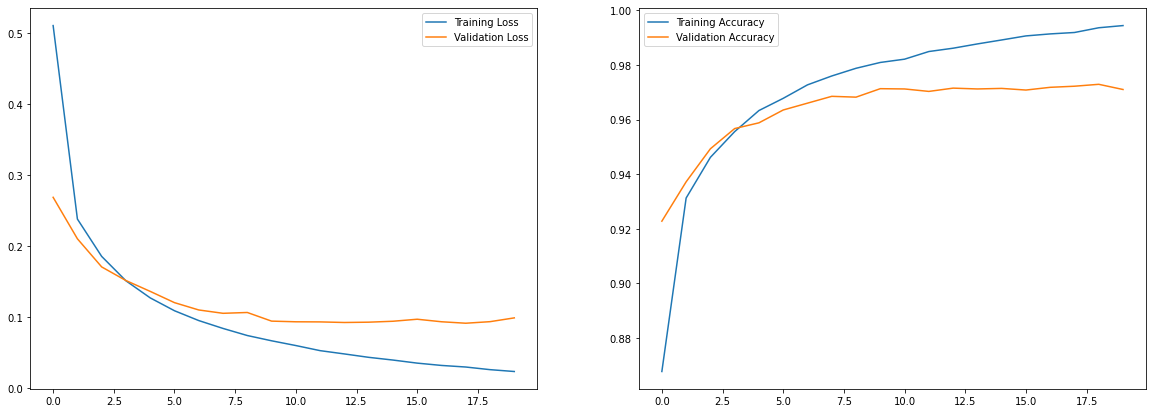

In [30]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

##Modification of the regularization term (l2)

In [31]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history_reg = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 activation_2 (Activation)   (None, 10)                0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


600/600 [==============================] - 2s 3ms/step - loss: 0.5263 - accuracy: 0.8662 - val_loss: 0.2913 - val_accuracy: 0.9229
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2614 - accuracy: 0.9299 - val_loss: 0.2259 - val_accuracy: 0.9403
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2077 - accuracy: 0.9455 - val_loss: 0.1898 - val_accuracy: 0.9503
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1742 - accuracy: 0.9553 - val_loss: 0.1683 - val_accuracy: 0.9571
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1509 - accuracy: 0.9623 - val_loss: 0.1534 - val_accuracy: 0.9617
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1342 - accuracy: 0.9668 - val_loss: 0.1404 - val_accuracy: 0.9643
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1202 - accuracy: 0.9717 - val_loss: 0.1340 - val_accuracy: 0.9651
Epoch 8/20
600/60

###Visualization of l2 results

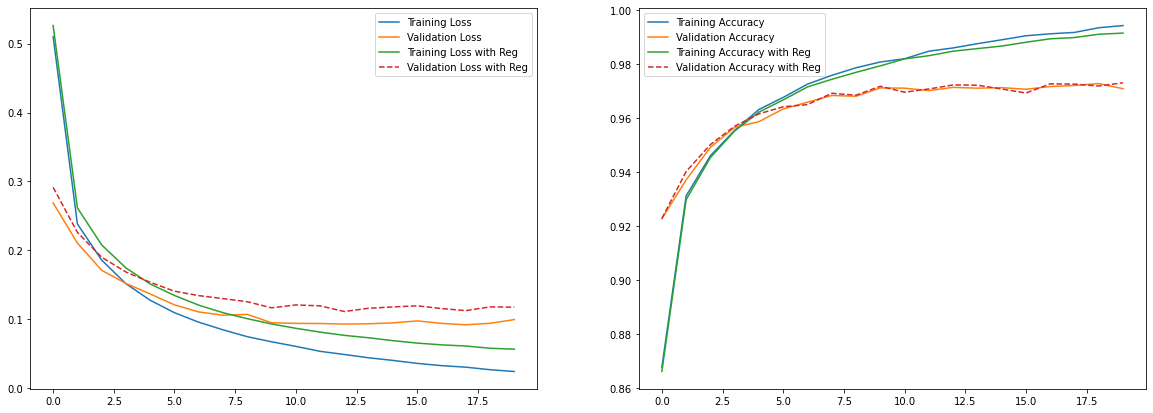

In [32]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.plot(tf_history_reg.history['loss'], label='Training Loss with Reg')
plt.plot(tf_history_reg.history['val_loss'], label='Validation Loss with Reg', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(tf_history_reg.history['accuracy'], label='Training Accuracy with Reg')
plt.plot(tf_history_reg.history['val_accuracy'], label='Validation Accuracy with Reg', linestyle='--')
plt.legend()
plt.show()

##DropOut Modification


In [35]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=50),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history_dp = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

###Visualization of the DropOut Technique

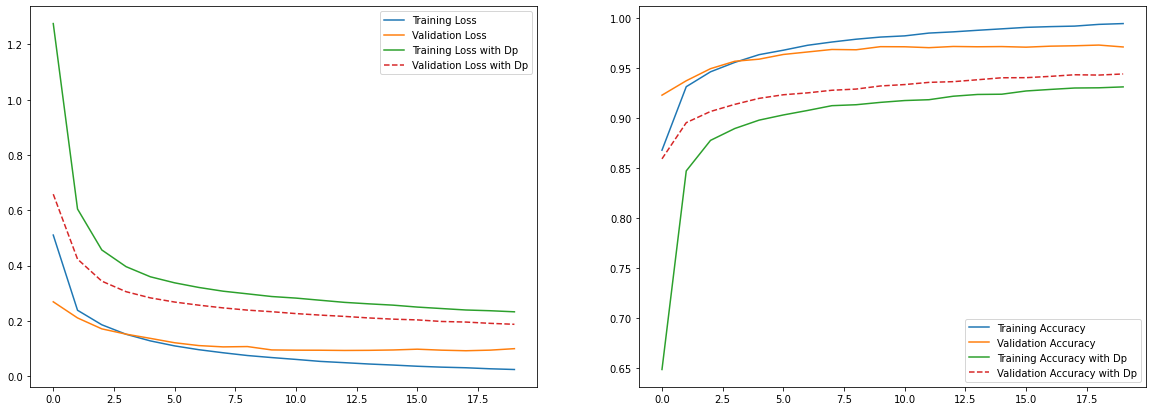

In [34]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.plot(tf_history_dp.history['loss'], label='Training Loss with Dp')
plt.plot(tf_history_dp.history['val_loss'], label='Validation Loss with Dp', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(tf_history_dp.history['accuracy'], label='Training Accuracy with Dp')
plt.plot(tf_history_dp.history['val_accuracy'], label='Validation Accuracy with Dp', linestyle='--')
plt.legend()
plt.show()